<a href="https://colab.research.google.com/github/MarkRAO/Big-Data-Machine-Learning/blob/master/Data%20Processing%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
##Data file: corpbonds_stocks.csv

1. Read in csv file to Jupyter Notebook in Google CoLab, using df = pd.read_csv()

2. Plot the data df.plot(), how many investments are there? what kind of assets? How many rows columns df.shape? Are there any missing observations?  

3. Print the df.describe().T, is this a well-behaved data set? Why/why not? 

4. Creating a dictionary for these investments: {  investment name: [total return, return in 2019, return in 2018, return in 2017], save as "investment_returns."} 

  Returns (%) are defined by (Value_end / Value_begin - 1)*100
  [Hint: pd.to_datetime() might help]

5. Creating a class called "winner" for those assets that had higher returns than "NKE-corpbond" in 2019.  

6. Creating a class called "loser" for those assets that did not beat "NKE-corpond" in 2019. 

7. Create a class that takes a certain list of tickers and outputs the index of an "equally-weighted" portfolio of given tickers. (e.g. input = ['AAPL-corpbond', 'IBM-stock']) 
also, a method that can output the graph of each ticker in list

8. *Capture and build the Corp Bond series from raw data available here: https://www.finra.org/filing-reporting/trace 

9. *Add to 7. optimal "mean-variance" portfolio use daily returns

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Q1
df = pd.read_csv('https://raw.githubusercontent.com/nthakor/imghost/master/corpbonds_stocks.csv')

Q2

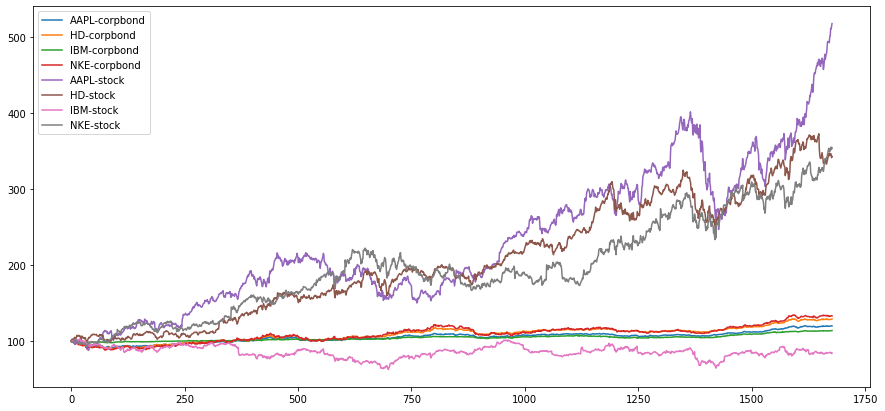

In [0]:
df.plot(figsize=(15,7))

In [0]:
#check if any null value
np.sum(df.isnull().values)

0

In [0]:
df.shape

(1678, 9)

In [0]:
df.head()

,Date,AAPL-corpbond,HD-corpbond,IBM-corpbond,NKE-corpbond,AAPL-stock,HD-stock,IBM-stock,NKE-stock
0,5/3/2013,100.00,100.00,100.00,100.00,100.000000,100.000000,100.000000,100.000000
1,5/6/2013,99.48,99.24,99.98,99.92,102.384573,101.757672,99.154088,99.085985
2,5/7/2013,99.40,99.03,99.92,99.83,101.929010,101.500789,99.569743,99.008499
3,5/8/2013,99.29,99.10,99.97,99.64,103.080161,101.974024,100.621012,98.993038
4,5/9/2013,99.21,98.86,99.99,99.74,102.180850,102.582472,99.844840,98.745172


In [0]:
# Q3
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL-corpbond,1678.0,105.331883,6.569989,91.360000,101.130000,106.675000,109.050000,120.410000
HD-corpbond,1678.0,109.188546,9.504278,89.460000,101.870000,111.880000,115.027500,129.560000
IBM-corpbond,1678.0,104.494142,3.751801,97.860000,101.692500,104.765000,106.197500,114.160000
NKE-corpbond,1678.0,109.723391,10.701541,88.670000,102.125000,111.135000,115.970000,134.510000
AAPL-stock,1678.0,230.509441,91.309121,88.089813,162.368700,203.014119,297.926176,517.370681
HD-stock,1678.0,206.465727,76.021049,99.303447,145.148096,192.895903,273.657868,372.617919
IBM-stock,1678.0,86.192638,7.349587,62.988042,82.299421,86.288200,91.228774,102.851375
NKE-stock,1678.0,196.926293,62.410174,93.497754,155.202186,187.839016,234.076894,355.103147


In [0]:
#Q4
def corpreturn(df):
    return ((df.iloc[-1]/df.iloc[0])-1)*100
df['Date'] = pd.to_datetime(df.Date)
rdf = df.groupby(df.Date.dt.year)[list(df.columns[1:])].apply(corpreturn)
rdf.reset_index(inplace=True)
rdf = rdf[rdf.Date >= 2017]
rdf.set_index(['Date'],inplace=True)
total_return = df[list(df.columns[1:])].apply(corpreturn).rename('total_return')
rdf = rdf.append(total_return)
inverstment_returns = rdf.to_dict('index')
inverstment_returns

{2017: {'AAPL-corpbond': 3.99849113542059,
  'AAPL-stock': 48.04253913205927,
  'HD-corpbond': 5.515869427615505,
  'HD-stock': 44.365186426077386,
  'IBM-corpbond': 2.2614028363357574,
  'IBM-stock': -4.6769658984247116,
  'NKE-corpbond': 6.580259222333007,
  'NKE-stock': 21.94096724872947},
 2018: {'AAPL-corpbond': -0.9100009100009077,
  'AAPL-stock': -7.0543307378402424,
  'HD-corpbond': -1.639062902256927,
  'HD-stock': -6.555964324120334,
  'IBM-corpbond': -0.7791232516661917,
  'IBM-stock': -22.974706434958257,
  'NKE-corpbond': -3.052461525380501,
  'NKE-stock': 18.093481048482964},
 2019: {'AAPL-corpbond': 10.34514411602716,
  'AAPL-stock': 88.7424475476812,
  'HD-corpbond': 12.60460251046025,
  'HD-stock': 30.113039247950567,
  'IBM-corpbond': 7.632075471698108,
  'IBM-stock': 21.924247813613995,
  'NKE-corpbond': 16.210801393728214,
  'NKE-stock': 38.24322825068178},
 'total_return': {'AAPL-corpbond': 20.209999999999994,
  'AAPL-stock': 417.370681,
  'HD-corpbond': 29.1800000

In [0]:
#Q5-6
class winlose:
    def __init__(self,data):
        self.data = data
        self.baseline = data[2019]['NKE-corpbond']
    def winner(self):
        winlist = []
        for key,val in self.data[2019].items():
            if val>self.baseline:
                winlist.append(key)
        return winlist
    def loser(self):
        loselist = []
        for key,val in self.data[2019].items():
            if val<self.baseline:
                loselist.append(key)
        return loselist
    
wl = winlose(inverstment_returns)
print(wl.winner())
print(wl.loser())

['AAPL-stock', 'HD-stock', 'IBM-stock', 'NKE-stock']
['AAPL-corpbond', 'HD-corpbond', 'IBM-corpbond']


year
2013    -0.865454
2014    18.261213
2015    10.591598
2016     3.209560
2017    18.314646
2018    -3.506142
2019    18.889662
dtype: float64


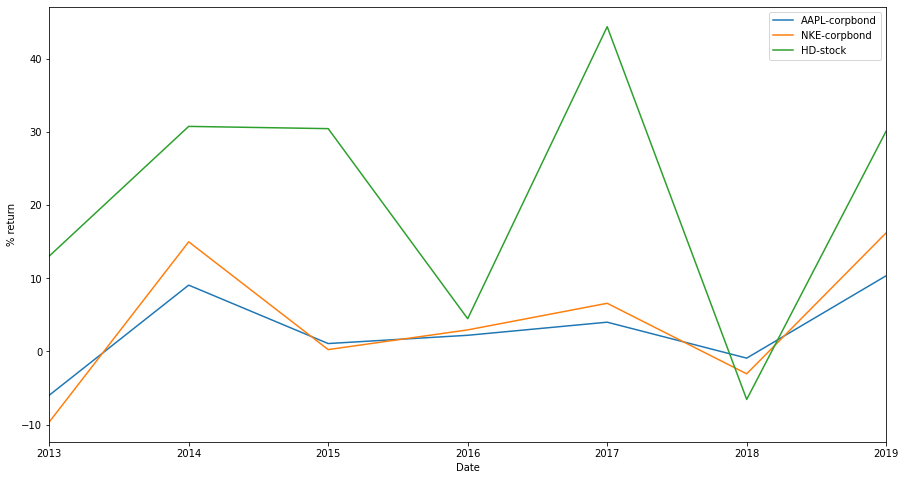

In [0]:
#Q7
class portfolio:
    def __init__(self,data):
        self.data = data
    def corpreturn(self,df):
        return ((df.iloc[-1]/df.iloc[0])-1)*100
    def process_data(self,timeline,tickers,dropdate):
        if timeline == 'daily':
            ddf = self.data.copy()
            if dropdate:
                tickers.insert(0,'Date')
            ddf = ddf[tickers]
            ddf['Date'] = pd.to_datetime(ddf.Date)
            ddf.set_index(['Date'],inplace=True)
            ddf = ddf.pct_change(periods=1, axis=0).dropna()
            ddf = ddf.apply(lambda x: x*100,axis=1)
            return ddf
        elif timeline == 'monthly':
            self.data.set_index(['Date'],inplace=True)
            mdf = self.data.groupby(pd.Grouper(freq='M'))[list(self.data.columns)].apply(self.corpreturn)[tickers]
            mdf.reset_index(inplace=True)
            mdf['month'] = list(zip(mdf.Date.dt.month,mdf.Date.dt.year))
            mdf.set_index(['month'],inplace=True)
            if dropdate:
                mdf.drop(columns=['Date'],inplace=True)
            return mdf
        elif timeline == 'quarterly':
            self.data.set_index(['Date'],inplace=True)
            qdf = self.data.groupby(pd.Grouper(freq='Q'))[list(self.data.columns)].apply(self.corpreturn)[tickers]
            qdf.reset_index(inplace=True)
            qdf['quarter'] = list(zip(qdf.Date.dt.quarter,qdf.Date.dt.year))
            qdf.set_index(['quarter'],inplace=True)
            if dropdate:
                qdf.drop(columns=['Date'],inplace=True)
            return qdf
        elif timeline == 'yearly':
            self.data.set_index(['Date'],inplace=True)
            ydf = self.data.groupby(pd.Grouper(freq='y'))[list(self.data.columns)].apply(self.corpreturn)[tickers]
            ydf.reset_index(inplace=True)
            ydf['year'] = ydf.Date.dt.year
            ydf.set_index(['year'],inplace=True)
            if dropdate:
                ydf.drop(columns=['Date'],inplace=True)
            return ydf
        else:
            raise ValueError("timeline can be only daily/monthly/quartely or yearly")
    def avgreturn(self,row):
        return np.mean(row)
    def ewp(self,tickers,timeline):
        self.tickers = tickers
        self.timeline = timeline
        self.data['Date'] = pd.to_datetime(self.data.Date)
        for asset in tickers:
            if asset not in self.data.columns:
                raise ValueError("{} not available in data".format(asset))
        df = self.process_data(timeline,tickers,True)
        df = df.apply(self.avgreturn,axis=1)
        return df
    def plot(self):
        try:
            self.data.reset_index(inplace=True)
            self.data['Date'] = pd.to_datetime(self.data.Date)
            df = self.process_data(self.timeline,self.tickers,False)
            if self.timeline == 'daily':
                df.reset_index(inplace=True)
            df.set_index(['Date'],inplace=True)
            ax = df.plot(figsize=[15,8])
            ax.set_ylabel('% return')
            return ax
        except AttributeError as e:
            print(e)
            print("Calculate portfolio first")

df = pd.read_csv('https://raw.githubusercontent.com/nthakor/imghost/master/corpbonds_stocks.csv')
port = portfolio(df)
sdf = port.ewp(['AAPL-corpbond', 'NKE-corpbond', 'HD-stock'],'yearly')
print(sdf)
port.plot()